# Exploration of the dataset with human balance evaluations

Marcos Duarte

Here is an exploration on the data set of quantitative and qualitative evaluations of 163 subjects.  
See the companiom data set website [https://bmclab.pesquisa.ufabc.edu.br/datasets/bds/](https://bmclab.pesquisa.ufabc.edu.br/datasets/bds/) for more information.  

First, let's import the necessary Python libraries and configure the environment:

## Setup

In [1]:
import warnings
import sys
from pathlib import Path
import glob
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
# IPython widgets:
from IPython.display import display
import ipywidgets
from ipywidgets import FloatProgress, interactive

### Configuration

In [2]:
pd.set_option('display.precision', 2)
sns.set_context("notebook", font_scale=1.2,
                rc={'font.size': 12, 'lines.linewidth': 2, 'lines.markersize': 10,
                    'axes.titlesize': 'x-large'})
sns.set_style("whitegrid")
matplotlib.rc('legend', numpoints=1, fontsize=12)

### Paths

In [3]:
# add path of custom functions
path_fun = Path(r'./../functions')
if not path_fun.exists():
    warnings.warn(f'Functions path {path_fun} does not exist.')
sys.path.append(r'./../functions')
from AMTIbsf import loadbsf
# path of all data files
path_data = Path(r'./../../../../X/BDS/')
if not path_data.exists():
    warnings.warn(f'Data path {path_data} does not exist.')

## Load information about all files of stabilography

In [4]:
# read file with all metadata and COP variables from the GitHub repo:
fname = 'https://raw.githubusercontent.com/BMClab/datasets/master/BDS/BDSinfoCOP.txt'
BDSinfo = pd.read_csv(fname, sep='\t', header=0, index_col=None, engine='c', encoding='utf-8')
print("Information of %s subjects loaded (%s rows, %s columns)."
      %(len(pd.unique(BDSinfo.Subject)), BDSinfo.shape[0], BDSinfo.shape[1]))

Information of 163 subjects loaded (1930 rows, 67 columns).


Here are the first 20 rows and 10 columns of the data:

In [5]:
BDSinfo.iloc[:20, :10]

,Trial,Subject,Vision,Surface,Age,AgeGroup,Gender,Height,Weight,BMI
0,BDS00001,1,Open,Firm,33.00,Young,F,157.5,54.2,21.85
1,BDS00002,1,Open,Firm,33.00,Young,F,157.5,54.2,21.85
2,BDS00003,1,Open,Firm,33.00,Young,F,157.5,54.2,21.85
3,BDS00004,1,Closed,Firm,33.00,Young,F,157.5,54.2,21.85
4,BDS00005,1,Closed,Firm,33.00,Young,F,157.5,54.2,21.85
5,BDS00006,1,Closed,Firm,33.00,Young,F,157.5,54.2,21.85
6,BDS00007,1,Open,Foam,33.00,Young,F,157.5,54.2,21.85
7,BDS00008,1,Open,Foam,33.00,Young,F,157.5,54.2,21.85
8,BDS00009,1,Open,Foam,33.00,Young,F,157.5,54.2,21.85
9,BDS00010,1,Closed,Foam,33.00,Young,F,157.5,54.2,21.85


The BDSinfo file has 1930 rows for 163 subjects because there are 12 rows for each subject related to the 12 experimental trials (6 subjects were not able to complete the most challemnging tasks). For now, to analyze the subjects's characteristics we can drop the additional rows for each subject:

In [6]:
info = BDSinfo.drop_duplicates(subset='Subject', inplace=False)
info.iloc[:10, :10]

,Trial,Subject,Vision,Surface,Age,AgeGroup,Gender,Height,Weight,BMI
0,BDS00001,1,Open,Firm,33.00,Young,F,157.5,54.20,21.85
12,BDS00013,2,Open,Firm,27.58,Young,F,154.0,44.00,18.55
24,BDS00025,3,Closed,Firm,36.92,Young,M,161.7,63.40,24.25
36,BDS00037,4,Open,Firm,61.75,Old,M,164.0,68.35,25.41
48,BDS00049,5,Closed,Firm,18.33,Young,F,162.0,56.45,21.51
60,BDS00061,6,Open,Foam,49.33,Young,M,163.5,70.65,26.43
72,BDS00073,7,Open,Firm,25.33,Young,M,182.7,68.70,20.58
84,BDS00085,8,Open,Foam,22.42,Young,F,161.8,65.40,24.98
96,BDS00097,9,Open,Firm,23.17,Young,F,158.0,66.00,26.44
108,BDS00109,10,Closed,Firm,26.17,Young,F,162.7,49.10,18.55


## Age group and gender

Here are the number of subjetcs in the data set by age group and gender:

In [7]:
info = BDSinfo.drop_duplicates(subset='Subject', inplace=False)
print('Number of subjects per group (N=%d):' %len(info))
display(info[['Subject', 'AgeGroup', 'Gender']].groupby(['AgeGroup', 'Gender']).count())

Number of subjects per group (N=163):


Subject
AgeGroup Gender         
Old      F            60
         M            16
Young    F            56
         M            31

And the corresponding mean and standard deviation values:

In [8]:
print('Mean and SD age values across subjects per group and gender')
info.groupby(['AgeGroup', 'Gender'])['Age'].agg([np.mean, np.std])

Mean and SD age values across subjects per group and gender


mean   std
AgeGroup Gender             
Old      F       71.69  6.79
         M       69.90  5.03
Young    F       27.83  8.09
         M       27.73  7.35

## Disability and illness

Of the 163 subjects (87 young adults and 76 elderly adults), 16 of them were classified as a person with disability and 106 subjects declared to have at least one illness:

In [9]:
#info.loc[info.Disability!='No', 'Disability'] = 'Yes'
#info.loc[info.Illness!='No', 'Illness'] = 'Yes'
display(info[['Subject', 'AgeGroup', 'Disability', 'Illness']].groupby(['AgeGroup', 'Disability', 'Illness']).count())

Subject
AgeGroup Disability Illness         
Old      No         No             8
                    Yes           56
         Yes        No             1
                    Yes           11
Young    No         No            47
                    Yes           36
         Yes        No             1
                    Yes            3

Because there were more disabilities in the older group, 12 vs. 4, one could select only people without disability if desired (uncomment the code below):

In [10]:
#info = info.ix[info.Disability=='No']
#print('Number of subjects without disability: %s' %len(info.Subject))

## Age, weight, height, and BMI 

Let's visualize the age, weight, height, and BMI values by gender of the subjects:

In [11]:
# convert Height units, cm to m:
info = info.assign(Height=info['Height']/100)
# info['Height'] = info['Height']/100 error: A value is trying to be set on a copy of a slice from a DataFrame...

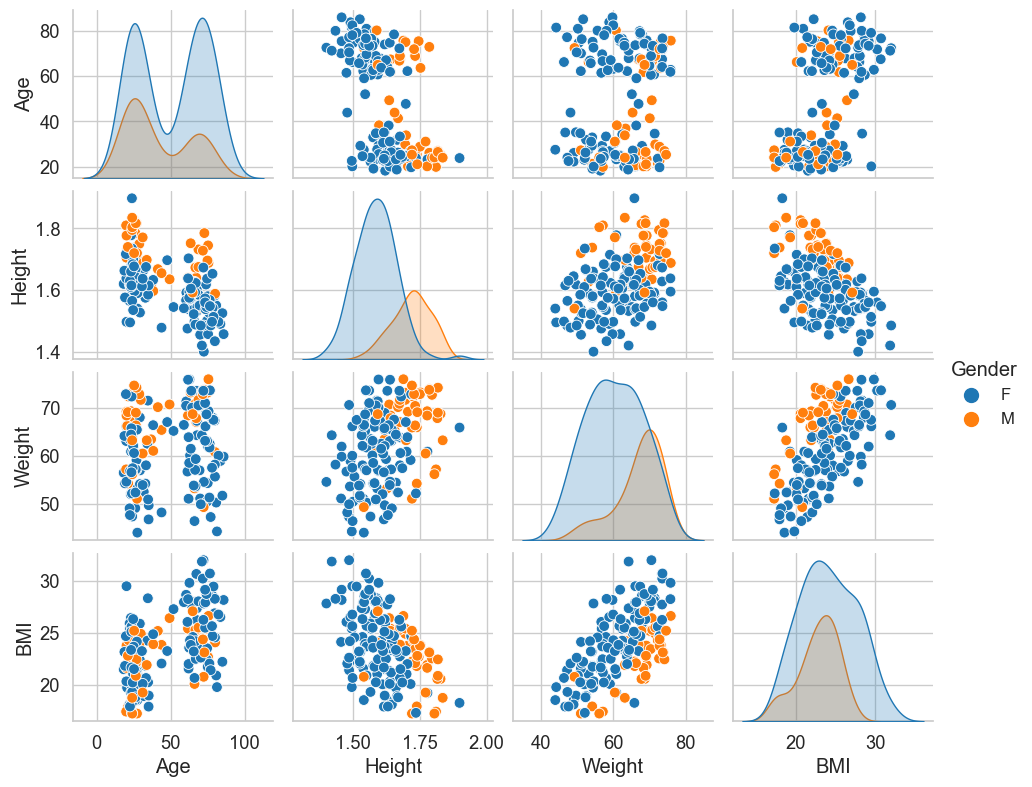

In [12]:
sns.pairplot(info[['Age', 'Gender', 'Height', 'Weight', 'BMI']], hue='Gender',
             height=2, aspect=1.2, plot_kws={'s':60})
plt.show()

From figure above, we can see a biomodal distribution for the age characteristic; data are from young subjects, mostly between 20 and 30 yrs. old, and from elderly subjects, between 60 and 80 yrs. old. Men are slightly taller and heavier than women but they seem to have similar BMI.

## Fallers

Let's see how many subjects fell at least once in the last 12 months:

In [13]:
info[['AgeGroup', 'Falls12m']][info.Falls12m > 0].groupby(['AgeGroup']).count()

,Falls12m
AgeGroup,
Old,19
Young,23


So, surprisingly the number of young and elderly subjects who fell at least once in the last 12 months are similar (21% of tle elderly adults and 23% of the young adults fell).

 ## Qualitative evaluations
 
 Let's see the results for the Short Falls Efficacy Scale International test (FES-I), Mini Balance Evaluation Systems Test (Mini-BESTest), International Physical Activity Questionnaire Short Version (IPAQ); and Trail Making Test (TMT).
 
 The IPAQ data scores are coded as 'Low', 'Moderate' and 'High'; let's convert to numbers, '0', '1' and '2', for comparing with the other evaluations:

In [14]:
info.replace({'IPAQ_S': {'Low': 0, 'Moderate': 1, 'High': 2}}, inplace=True)

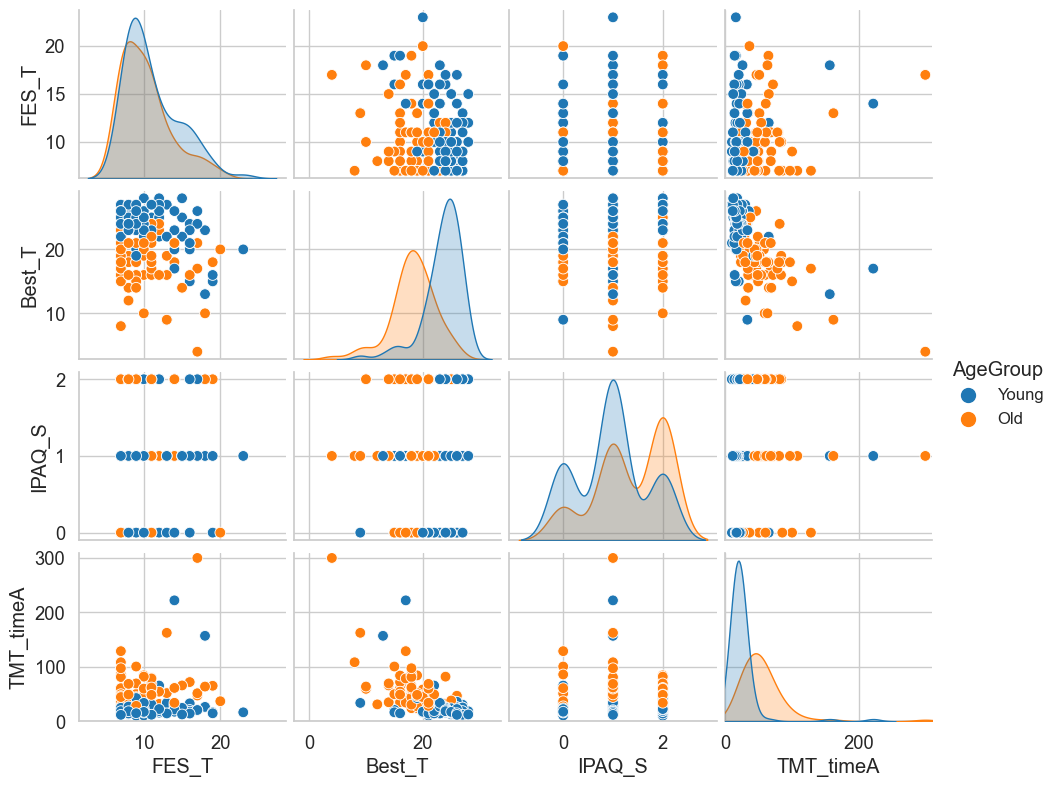

In [15]:
g = sns.pairplot(info[['AgeGroup', 'FES_T', 'Best_T', 'IPAQ_S', 'TMT_timeA']], hue='AgeGroup',
             height=2, aspect=1.2, plot_kws={'s':60})
axes = g.axes
for i in range(4):
    axes[i,3].set_xlim(0, 310)
    axes[3,i].set_ylim(0, 310)
plt.show()

## Quantitative evaluation

The raw data from the stabilography evaluation, composed by the force platform signals plus the center of pressure (COP), in the anterior-posterior (ap), and medio-lateral (ml) directions, are stored in other files (1930 files!); the BSDinfo file just stores the names of these files according to subject's name and conditions.  
Here is an examplary plot of the eight signals (3 forces, 3 moments of force and 2 COPs) of the first trial of the first subject:

In [16]:
filename = path_data / 'BDS00038.txt'
grf = pd.read_csv(filename, delimiter='\t', skiprows=1, header=None,
                  names=['Time','Fx','Fy','Fz','Mx','My','Mz','COPx','COPy'], engine='c')

In [17]:
def bdb_plot_grf(grf):
    
    Funits = 'N'
    Munits = 'Nm'
    COPunits = 'cm'
    t, Fx, Fy, Fz, Mx, My, Mz, COPx, COPy = [_ for _ in grf.values.T]

    plt.figure(figsize=(12, 7))

    gs1 = gridspec.GridSpec(3, 2)
    gs1.update(bottom=0.5, top=0.95, hspace=0.12, wspace=.15)
    ax1 = plt.subplot(gs1[0, 0])
    ax2 = plt.subplot(gs1[1, 0])
    ax3 = plt.subplot(gs1[2, 0])
    ax4 = plt.subplot(gs1[0, 1])
    ax5 = plt.subplot(gs1[1, 1])
    ax6 = plt.subplot(gs1[2, 1])

    gs2 = gridspec.GridSpec(3, 3)
    gs2.update(bottom=0.08, top=0.42, wspace=0.25)
    ax7 = plt.subplot(gs2[:, :-1])
    ax8 = plt.subplot(gs2[:, 2])

    ax1.set_ylabel('Fx (%s)' %Funits)
    ax1.set_xticklabels([]), ax1.locator_params(axis='y', nbins=4)
    ax1.yaxis.set_label_coords(-.14, 0.5)
    ax2.set_ylabel('Fy (%s)' %Funits)
    ax2.set_xticklabels([]), ax2.locator_params(axis='y', nbins=4)
    ax2.yaxis.set_label_coords(-.14, 0.5)
    ax3.set_ylabel('Fz (%s)' %Funits)
    ax3.locator_params(axis='y', nbins=4)
    ax3.yaxis.set_label_coords(-.14, 0.5)
    ax3.set_xlabel('Time (s)')
    ax4.set_ylabel('Mx (%s)' %Munits)
    ax4.set_xticklabels([]), ax4.locator_params(axis='y', nbins=4)
    ax4.yaxis.set_label_coords(-.1, 0.5)
    ax5.set_ylabel('My (%s)' %Munits)
    ax5.set_xticklabels([]), ax5.locator_params(axis='y', nbins=4)
    ax5.yaxis.set_label_coords(-.1, 0.5)
    ax6.set_ylabel('Mz (%s)' %Munits)
    ax6.locator_params(axis='y', nbins=4)
    ax6.yaxis.set_label_coords(-.1, 0.5)
    ax6.set_xlabel('Time (s)')
    ax7.set_xlabel('Time (s)')
    ax7.set_ylabel('COP (%s)' %COPunits)
    ax8.set_xlabel('COPml (%s)' %COPunits)
    ax8.set_ylabel('COPap (%s)' %COPunits)

    ax1.plot(t, Fx)
    ax2.plot(t, Fy)
    ax3.plot(t, Fz)
    ax4.plot(t, Mx)
    ax5.plot(t, My)
    ax6.plot(t, Mz)
    ax7.plot(t, COPx, 'b', label='COP ap')
    ax7.plot(t, COPy, 'r', label='COP ml')
    ax7.yaxis.set_label_coords(-.1, 0.5)
    ax7.legend(fontsize=10, loc='best', framealpha=.5)
    ax8.plot(COPy, COPx)
    ax8.locator_params(axis='both', nbins=5)
    plt.suptitle('Ground reaction force data during quiet standing', fontsize=18, y=1)

    plt.show()

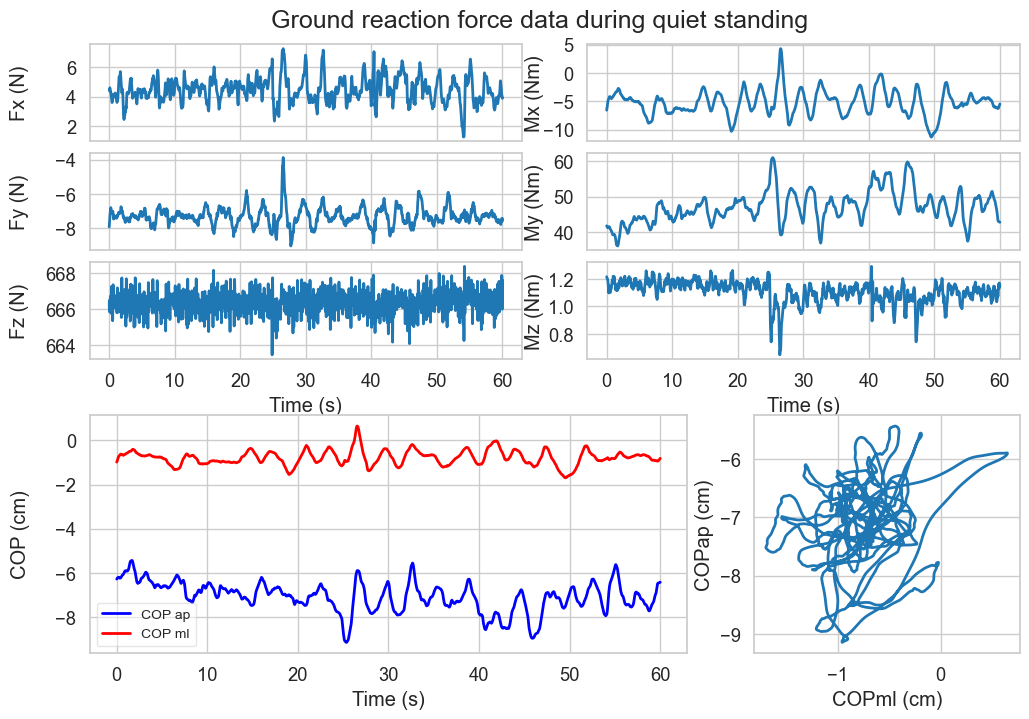

In [18]:
bdb_plot_grf(grf)

Let's load all files from the stabilography evaluation and calculate some variables to quantify the stabilography data. The notexbook http://nbviewer.jupyter.org/github/demotu/BMC/blob/master/notebooks/Stabilography.ipynb describes some of the most typical measurements employed to quantify postural sway using the COP data.  
Let's calculate here the variables COP area COP mean velocity (resultant), and COP frequency (resultant).

In [19]:
# import the python functions to calculate the COP variables
from psd2 import psd2
from hyperellipsoid import hyperellipsoid

def COPmfreq(COP, freq):
    N = COP.shape[0]
    fp_ap, mf_ap, fmax_ap, Ptot_ap, F, P_ap = psd2(COP[:, 0], fs=freq, window='hann', nperseg=N/2,
                                                   noverlap=N/4, nfft=N/2, detrend='constant', show=False)
    fp_ml, mf_ml, fmax_ml, Ptot_ml, F, P_ml = psd2(COP[:, 1], fs=freq, window='hann', nperseg=N/2,
                                                   noverlap=N/4, nfft=N/2, detrend='constant', show=False)
    mf_res = (mf_ap*np.sum(P_ap) + mf_ml*np.sum(P_ml))/(np.sum(P_ap)+np.sum(P_ml))
    #print(mf_ap, mf_ml, mf_res)
    return mf_res

In [20]:
from scipy.signal import detrend

fp = FloatProgress(min=0, max=len(BDSinfo.Trial)-1)
display(fp)
freq = 100
for i, fname in enumerate(BDSinfo.Trial):
    filename = path_data / (fname + '.txt')
    fp.description = f'Reading data from file {filename.name} ({i+1}/{len(BDSinfo.Trial)})/n'
    fp.value = i
    grf = pd.read_csv(filename, delimiter='\t', skiprows=1, header=None,
                      names=['Time','Fx','Fy','Fz','Mx','My','Mz','COPx','COPy'], engine='c')   
    COP = grf[['COPx', 'COPy']].values
    # discard the first 5s for the accomodation period
    #grf = grf.iloc[5*freq:, :]
    #COP = COP[5*freq:, :]
    #COP = detrend(COP, axis=0, type='linear')
    area, axes, angles, center, R = hyperellipsoid(COP, show=False)
    velo = np.sum(np.abs(np.sqrt(np.sum(np.diff(COP, axis=0)**2, axis=1))), axis=0)/(COP.shape[0]/freq)   
    mfreq = COPmfreq(COP, freq)
    BDSinfo.loc[i, 'COParea'] = area
    BDSinfo.loc[i, 'COPvelo'] = velo
    BDSinfo.loc[i, 'COPmfreq'] = mfreq
    
BDSinfo.to_csv(path_data / 'BDSinfoCOP.txt', sep='\t', encoding='utf-8', index=False)
BDSinfo.to_excel(path_data / 'BDSinfoCOP.xlsx', index=False)
print(f'Data from {len(BDSinfo.Trial)} files were processed.')

FloatProgress(value=0.0, max=1929.0)

Data from 1930 files were processed.


In [21]:
# read file with all metadata and COP variables from the GitHub repo:
fname = 'https://raw.githubusercontent.com/BMClab/datasets/master/BDS/BDSinfoCOP.txt'
BDSinfo = pd.read_csv(fname, sep='\t', header=0, index_col=None, engine='c', encoding='utf-8')
print("Information from %s files successfully loaded (total of %s subjects)."
      %(len(BDSinfo), len(pd.unique(BDSinfo.Subject))))

Information from 1930 files successfully loaded (total of 163 subjects).


In [22]:
display(BDSinfo[['Trial', 'Subject', 'Vision', 'Surface', 'COParea', 'COPvelo', 'COPmfreq']].head(15))
#qgrid.show_grid(BDSinfo[['Trial', 'Subject', 'AgeGroup', 'Vision', 'Surface', 'COParea', 'COPvelo', 'COPmfreq']])

,Trial,Subject,Vision,Surface,COParea,COPvelo,COPmfreq
0,BDS00001,1,Open,Firm,0.94,0.62,0.26
1,BDS00002,1,Open,Firm,1.06,0.70,0.14
2,BDS00003,1,Open,Firm,0.48,0.65,0.31
3,BDS00004,1,Closed,Firm,0.47,0.60,0.32
4,BDS00005,1,Closed,Firm,1.45,0.67,0.17
5,BDS00006,1,Closed,Firm,0.36,0.57,0.37
6,BDS00007,1,Open,Foam,3.95,2.01,0.40
7,BDS00008,1,Open,Foam,2.97,2.00,0.46
8,BDS00009,1,Open,Foam,3.46,1.82,0.40
9,BDS00010,1,Closed,Foam,6.46,2.07,0.33


Because we have 3 trials per condition for each subject, let's take the median across trials for each subject as representative of the subject:

In [23]:
BDSinfo = BDSinfo.groupby(['Subject','Vision','Surface','Illness','Disability','AgeGroup'],
                          as_index=False).median(numeric_only=True)
display(BDSinfo[['Subject', 'Vision', 'Surface', 'COParea', 'COPvelo', 'COPmfreq']].head(12))
#qgrid.show_grid(BDSinfo[['Subject', 'Vision', 'Surface', 'COParea', 'COPvelo', 'COPmfreq']])
print('%s subjects.' %len(pd.unique(BDSinfo.Subject)))

,Subject,Vision,Surface,COParea,COPvelo,COPmfreq
0,1,Closed,Firm,0.47,0.60,0.32
1,1,Closed,Foam,5.89,1.86,0.33
2,1,Open,Firm,0.94,0.65,0.26
3,1,Open,Foam,3.46,2.00,0.40
4,2,Closed,Firm,0.91,0.61,0.17
5,2,Closed,Foam,11.03,1.97,0.30
6,2,Open,Firm,0.56,0.52,0.23
7,2,Open,Foam,7.56,1.59,0.26
8,3,Closed,Firm,2.26,1.16,0.24
9,3,Closed,Foam,15.20,3.69,0.39


163 subjects.


Once again, if desired do not consider the subjects with disabilities because their numbers are unbalanced in the age groups (uncomment the code below):

In [24]:
#BDSinfo = BDSinfo.ix[BDSinfo.Disability=='No']

Number of subjects without disabilities in the data set:

In [25]:
BDSinfo.drop_duplicates(subset='Subject')[['AgeGroup', 'Subject']].groupby(['AgeGroup']).count()

,Subject
AgeGroup,
Old,76
Young,87


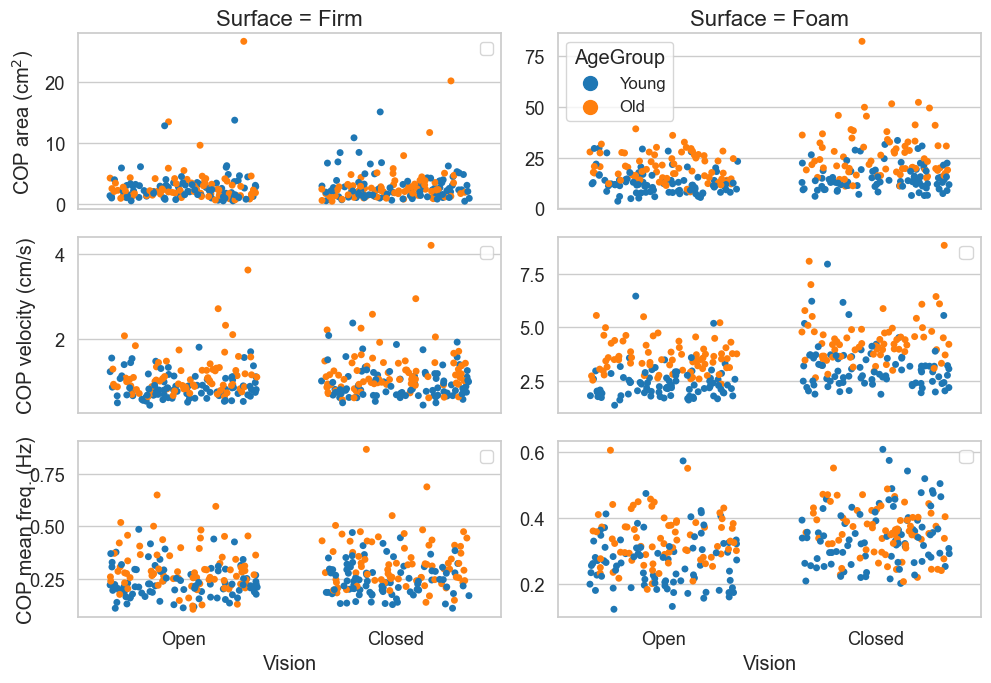

In [26]:
fig, ax = plt.subplots(3, 2, figsize=(10, 7))

sns.stripplot(x='Vision', y='COParea', hue='AgeGroup', order=['Open', 'Closed'],
              data=BDSinfo[BDSinfo.Surface=='Firm'], jitter=.35, size=4, ax=ax[0,0], s=5)
ax[0,0].set_xlabel('')
ax[0,0].set_xticklabels('')
ax[0,0].set_ylabel('COP area (cm$^2$)')
ax[0,0].yaxis.set_label_coords(-.1, .5)
ax[0,0].legend('')
ax[0,0].set_title('Surface = Firm', fontsize=16)
sns.stripplot(x='Vision', y='COParea', hue='AgeGroup', order=['Open', 'Closed'],
              data=BDSinfo[BDSinfo.Surface=='Foam'], jitter=.35, size=4, ax=ax[0,1], s=5)
ax[0,1].set_xlabel('')
ax[0,1].set_xticklabels('')
ax[0,1].set_ylabel('')
ax[0,1].legend(title='AgeGroup', loc='upper left')
ax[0,1].set_title('Surface = Foam', fontsize=16)

sns.stripplot(x='Vision', y='COPvelo', hue='AgeGroup', order=['Open', 'Closed'],
              data=BDSinfo[BDSinfo.Surface=='Firm'], jitter=.35, size=4, ax=ax[1,0], s=5)
ax[1,0].set_xlabel('')
ax[1,0].set_xticklabels('')
ax[1,0].set_ylabel('COP velocity (cm/s)')
ax[1,0].yaxis.set_label_coords(-.1, .5)
ax[1,0].legend('')
sns.stripplot(x='Vision', y='COPvelo', hue='AgeGroup', order=['Open', 'Closed'],
              data=BDSinfo[BDSinfo.Surface=='Foam'], jitter=.35, size=4, ax=ax[1,1], s=5)
ax[1,1].set_xlabel('')
ax[1,1].set_xticklabels('')
ax[1,1].set_ylabel('')
ax[1,1].legend('')

sns.stripplot(x='Vision', y='COPmfreq', hue='AgeGroup', order=['Open', 'Closed'],
              data=BDSinfo[BDSinfo.Surface=='Firm'], jitter=.35, size=4, ax=ax[2,0], s=5)
ax[2,0].set_ylabel('COP mean freq. (Hz)')
ax[2,0].yaxis.set_label_coords(-.1, .5)
ax[2,0].legend('')

sns.stripplot(x='Vision', y='COPmfreq', hue='AgeGroup', order=['Open', 'Closed'],
              data=BDSinfo[BDSinfo.Surface=='Foam'], jitter=.35, size=4, ax=ax[2,1], s=5)
ax[2,1].set_ylabel('')
ax[2,1].legend('')

plt.tight_layout()
plt.show()

**Figure. Plot of the variables COP area, COP velocity and COP mean frequency for each subject by age group at the different conditions.**

The mean and standard deviation values for the variables COP area, COP velocity and COP mean frequency are:

In [27]:
BDSinfo.groupby(['AgeGroup', 'Vision', 'Surface'])[['COParea', 'COPvelo', 'COPmfreq']].agg([np.mean, np.std])

COParea        COPvelo       COPmfreq      
                           mean    std    mean   std     mean   std
AgeGroup Vision Surface                                            
Old      Closed Firm       2.76   2.65    1.22  0.56     0.32  0.12
                Foam      26.88  12.22    4.38  1.11     0.36  0.07
         Open   Firm       2.91   3.35    1.13  0.49     0.30  0.11
                Foam      20.10   6.91    3.59  0.72     0.34  0.08
Young    Closed Firm       2.86   2.38    0.96  0.38     0.25  0.08
                Foam      14.93   6.23    3.14  1.05     0.35  0.09
         Open   Firm       2.49   2.15    0.87  0.30     0.23  0.08
                Foam      12.89   5.95    2.38  0.73     0.27  0.08

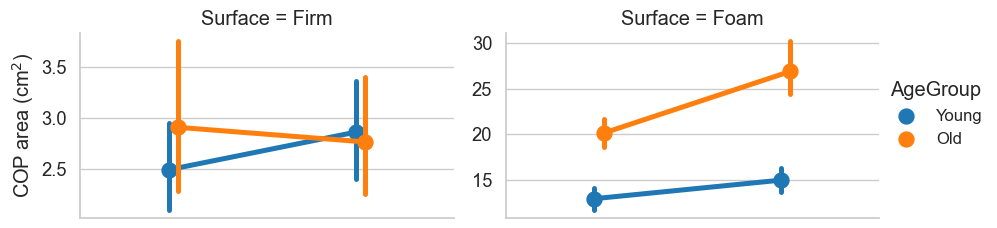

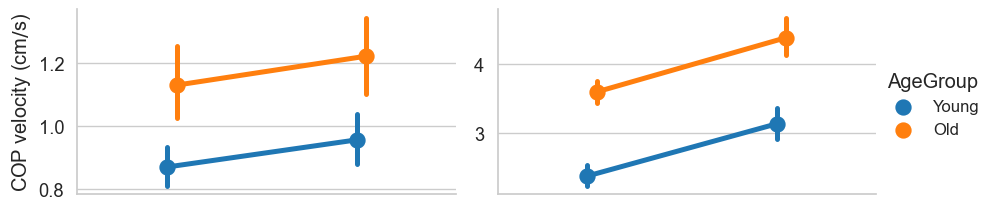

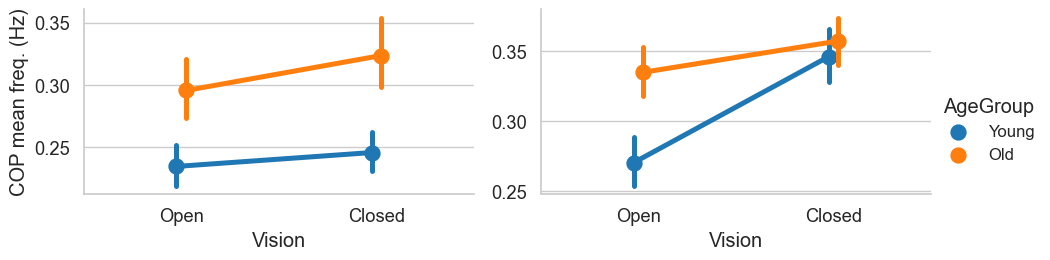

In [28]:
g0 = sns.catplot(x='Vision', y='COParea', hue='AgeGroup', order=['Open', 'Closed'],
                 data=BDSinfo, estimator=np.mean, errorbar=('ci', 95),
                 col='Surface', kind='point', dodge=True, sharey=False, height=3.0,
                 aspect=1.5)
g0.set_xticklabels('')
g0.set_axis_labels('', 'COP area (cm$^2$)')
g1 = sns.catplot(x='Vision', y='COPvelo', hue='AgeGroup', order=['Open', 'Closed'], data=BDSinfo,
                 estimator=np.mean, errorbar=('ci', 95),
                 col='Surface', kind='point', dodge=True, sharey=False, height=3.0, aspect=1.5)
g1.set_axis_labels('', 'COP velocity (cm$/$s)')
g1.set_titles('','')
g1.set_xticklabels('')
g2 = sns.catplot(x='Vision', y='COPmfreq', hue='AgeGroup', order=['Open', 'Closed'], data=BDSinfo,
                 estimator=np.mean, errorbar=('ci', 95),
                 col='Surface', kind='point', dodge=True, sharey=False, height=3.0, aspect=1.6)
g2.set_axis_labels('Vision', 'COP mean freq. (Hz)')
g2.set_titles('','')
plt.show()

**Figure. Plot of the mean and 95% CI for the variables COP area and COP velocity across subjects by age group at the different conditions.**

Here are scatter plots of the COP variables for the most challenging condition (Surface=Foam and Vision=Closed):

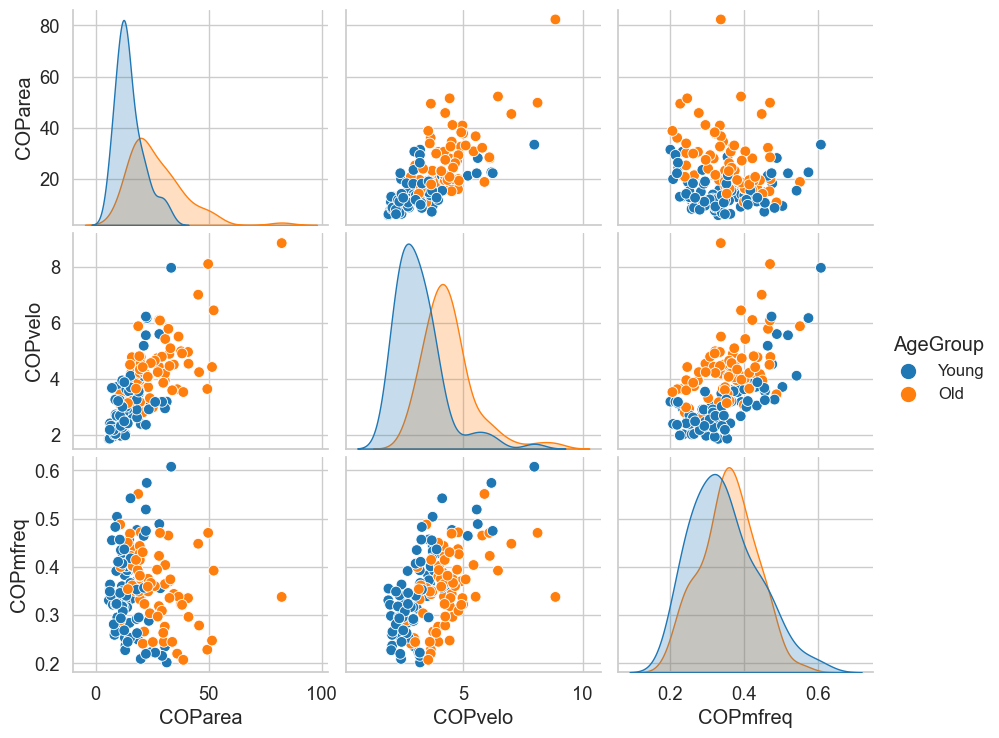

In [29]:
data = BDSinfo[(BDSinfo.Surface=='Foam') & (BDSinfo.Vision=='Closed')]
sns.pairplot(data[['AgeGroup', 'COParea', 'COPvelo', 'COPmfreq']], hue='AgeGroup', height=2.5, aspect=1.2, plot_kws={'s':60})
plt.show()